In [4]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm

#from skbio.stats.composition import clr
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer

def color_big_red(val):
    color = 'red' if abs(val) >0.4 else 'black'
    return 'color: %s' % color

## Data 

In [5]:
#Create a DataFrame from an excel document
#DataFrame documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
data = pd.read_excel(r'2020_CO_terms_cleaned.xlsx')

In [6]:
#Returns a tupple representing the dimensionality
#of the DataFrame (rows, columns)
data.shape

(8041, 256)

In [7]:
#Returns the first n (defaults to 5) rows of a DataFrame 
data.head()

,Unnamed: 0,Term,Category,2019-02-15 00:00:00,2019-02-16 00:00:00,2019-02-17 00:00:00,2019-02-18 00:00:00,2019-02-19 00:00:00,2019-02-20 00:00:00,2019-02-21 00:00:00,...,2019-10-16 00:00:00,2019-10-17 00:00:00,2019-10-18 00:00:00,2019-10-19 00:00:00,2019-10-20 00:00:00,2019-10-21 00:00:00,2019-10-22 00:00:00,2019-10-23 00:00:00,2019-10-24 00:00:00,2019-10-25 00:00:00
0,0,% of people,Electability,NaN,0.000015,NaN,NaN,0.000009,NaN,NaN,...,NaN,0.000010,0.000012,NaN,NaN,0.000010,0.000010,0.000011,NaN,0.000011
1,1,1 diabetes,Healthcare,0.000013,0.000015,0.000017,NaN,NaN,NaN,0.000010,...,0.000012,0.000010,NaN,0.000036,NaN,0.000010,0.000022,0.000011,0.000010,0.000011
2,2,1 president,Electability,0.000029,0.000032,0.000069,0.000066,0.000038,0.000072,0.000027,...,0.000064,0.000044,0.000040,0.000040,0.000042,0.000029,0.000022,0.000047,0.000061,0.000042
3,4,100 homes,Economy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000009,NaN,NaN
4,5,100+ northern colorado veterans,Veterans,0.000405,0.000381,0.000405,0.000393,0.000510,0.000501,0.000527,...,0.000585,0.000375,0.000558,0.000524,0.000684,0.000455,0.000529,0.000576,0.000454,0.000450


In [8]:
#Select the count of Terms from the DataFrame, grouped by category
data[['Category', 'Term']].groupby('Category').count()

,Term
Category,
Agriculture,70
Campaign Finance,24
Congress,276
Conspiracy,48
Corporate Regulation,42
Criminal Justice,380
Cybersecurity,25
Economy,1397
Education,285


In [9]:
# Setting up variables for each category.
# Not used but may be helpful
#
# Create a DataFrame that is a subset of the "data" DataFrame, which
# Only includes rows in which the category is in the specified
# category
conspiracy = data[data['Category'].isin(['Conspiracy', 'Mueller/Russia'])]
corpreg = data[data['Category'].isin(['Corporate Regulation'])]
crime = data[data['Category'].isin(['Criminal Justice', 'Public Safety', 'Guns'])]
econ_health = data[data['Category'].isin(['Economy', 'Healthcare'])]
education = data[data['Category'].isin(['Education'])]
electability = data[data['Category'].isin(['Electability'])]
environment = data[data['Category'].isin(['Environmental'])]
ethics = data[data['Category'].isin(['Ethics/Morals'])]
immigration = data[data['Category'].isin(['Immigration'])]
impeachment = data[data['Category'].isin(['Impeachment'])]
law_gov = data[data['Category'].isin(['Campaign Finance', 'Judiciary Branch', 'Generic Policy Queries', 'Voter Turnout', 'Election Security', 'Congress', 'Cybersecurity'])]
media = data[data['Category'].isin(['Media'])]
religion = data[data['Category'].isin(['Religion'])]
rephealth = data[data['Category'].isin(['Reproductive Health'])]
soceq = data[data['Category'].isin(['Social Equality'])]
taxes = data[data['Category'].isin(['Taxes/Spending'])]
trade_ag = data[data['Category'].isin(['Trade', 'Agriculture'])]
war = data[data['Category'].isin(['War'])]

# PCA
#### Run if PCA has not already been done

In [10]:
df = data.drop(columns={"Term"}).fillna(0).groupby('Category').mean().T
#df.drop(columns={'Space','Impeachment','State/Local', 'Corporate Responsibility'},inplace=True)
df['tot'] = df.sum(axis=1)
for i in df.columns:
    df[i] = df[i] / df.tot
df.drop(columns={'tot'},inplace=True)

In [11]:
fa = FactorAnalyzer(n_factors=14, rotation='varimax')
fa.fit(df)

factors = pd.DataFrame(fa.loadings_, index=list(df.columns)).style.applymap(color_big_red)
factors

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Agriculture,-0.0315867,0.336597,0.312021,0.579141,0.104606,0.0405875,0.0277836,0.0234315,0.0158814,-0.232986,-0.00775121,0.175586,-0.0611781,-0.189406
Campaign Finance,-0.034875,-0.159649,0.91163,0.0983824,0.0951724,-0.0130742,-0.0396052,0.00443768,-0.0624357,-0.00952544,0.0317947,0.114624,0.0178002,-0.0805909
Congress,-0.0748044,-0.17065,-0.0894146,0.0238915,0.568138,-0.136051,0.350543,-0.0601762,-0.065133,0.00637922,0.0988798,0.120867,0.143037,-0.0747744
Conspiracy,0.125636,-0.109581,0.489834,0.280253,0.199362,0.0134942,-0.00486414,-0.0414886,-0.0579647,0.0656205,0.0244095,0.0456821,-0.0522951,0.0875632
Corporate Regulation,0.810953,-0.0804639,0.0904014,-0.162739,-0.193068,0.0147999,-0.0928208,-0.0473422,0.052507,0.109364,0.0559262,-0.0775008,0.311925,-0.0600617
Criminal Justice,0.570918,0.47,-0.415127,-0.127003,-0.0740294,-0.0324029,0.0400921,-0.0533421,-0.075861,-0.0748485,0.103568,-0.250003,-0.0180425,0.144963
Cybersecurity,0.50988,0.2686,0.280173,0.2663,0.0729498,0.0198177,0.031402,-0.0434713,0.0172662,-0.171137,0.0592862,-0.18277,-0.204996,0.00967698
Economy,0.877795,0.277117,-0.0326463,-0.102944,-0.151597,-0.0165468,0.0215136,-0.00743747,0.0451351,0.155691,0.132432,-0.00642195,0.0351459,0.0162233
Education,0.290701,-0.0081986,-0.0520337,0.115431,0.0653478,0.105864,0.441327,-0.243304,0.00954661,0.0258578,0.456459,0.129552,0.0120866,0.054491
Electability,-0.143911,0.172934,0.159721,0.214755,0.789828,-0.0180421,-0.043705,-0.033393,-0.0737435,0.160807,0.0271744,0.119926,0.0369514,0.185704


In [12]:
fa_var = fa.get_factor_variance()
fa_var

(array([5.06030615, 3.36175566, 3.06074415, 2.33815369, 2.26181701,
        1.5046183 , 1.3525151 , 1.18796717, 1.15652952, 1.13739366,
        0.82472386, 0.75786679, 0.46827507, 0.4353142 ]),
 array([0.15334261, 0.10187138, 0.09274982, 0.07085314, 0.06853991,
        0.04559449, 0.04098531, 0.03599901, 0.03504635, 0.03446647,
        0.02499163, 0.02296566, 0.01419015, 0.01319134]),
 array([0.15334261, 0.25521399, 0.34796382, 0.41881696, 0.48735687,
        0.53295136, 0.57393667, 0.60993567, 0.64498202, 0.6794485 ,
        0.70444013, 0.72740579, 0.74159594, 0.75478728]))

## Map data to PCA Categories and include dependents

In [17]:
# PCA Category Mappings and Dependent variable files
pca_cats = pd.read_excel('2020 Dems Category Mapping.xlsx', sheet_name="Sheet1")
dependents = pd.read_excel('2020 Dependent.xlsx',sheet_name='Sheet1')
# Keep only the dependents we want...
dependents = dependents.drop(columns={'Hickenlooper_raw', 'Gardner_raw'})

In [18]:
dependents = dependents.rename(columns = {'Unnamed: 0':'Date'})

In [19]:
dependents.head()

,Date,Hickenlooper_adj,Gardner_adj
0,2019-02-15,0.474177,0.525823
1,2019-02-16,0.474032,0.525968
2,2019-02-17,0.473836,0.526164
3,2019-02-18,0.473768,0.526232
4,2019-02-19,0.474318,0.525682


In [20]:
reg_df = pd.merge(data,pca_cats,on='Category',how='left').drop(["Term"],axis = 1).groupby('Component').sum().T
reg_df = reg_df.drop('Unnamed: 0', axis = 0)
reg_df = reg_df.reset_index().rename(columns={'index':'Date'})
reg_df['Date'] = pd.to_datetime(reg_df['Date'], infer_datetime_format=True)
reg_df = pd.merge(reg_df,dependents,on='Date',how='inner')
reg_df = reg_df.fillna(0)

In [21]:
# reg_df will be the clean dataframe used for modeling
reg_df.head()

,Date,CampFin,Conspiracy_Mueller,CorpReg,Crime,Econ_Health,Educ,Electability,Environment,Ethics,...,Law_Govt,Media,Religion,ReprHealth,SocEq,Taxes,Trade_Agr,War,Hickenlooper_adj,Gardner_adj
0,2019-02-15,0.000175,0.004315,0.002915,0.207685,0.201643,0.028119,0.063079,0.032814,0.019238,...,0.067476,0.025396,0.003561,0.007064,0.057543,0.019798,0.006152,0.134410,0.474177,0.525823
1,2019-02-16,0.000158,0.004365,0.002273,0.227875,0.187248,0.027065,0.061439,0.038872,0.018166,...,0.070125,0.023598,0.004175,0.008580,0.051307,0.014653,0.006433,0.134555,0.474032,0.525968
2,2019-02-17,0.000251,0.005051,0.002411,0.218159,0.191872,0.028395,0.064988,0.041812,0.019821,...,0.064868,0.028375,0.005589,0.009026,0.058129,0.012476,0.006612,0.123768,0.473836,0.526164
3,2019-02-18,0.000164,0.004391,0.003042,0.206623,0.217505,0.030776,0.065419,0.038804,0.021084,...,0.057048,0.023278,0.004083,0.008865,0.060552,0.012737,0.006438,0.116312,0.473768,0.526232
4,2019-02-19,0.000179,0.004687,0.002955,0.202559,0.211962,0.033133,0.071472,0.034990,0.021512,...,0.064920,0.024379,0.003383,0.007816,0.061677,0.011486,0.006211,0.111861,0.474318,0.525682


In [40]:
reg_df.columns

Index(['Date', 'CampFin', 'Conspiracy_Mueller', 'CorpReg', 'Crime',
       'Econ_Health', 'Educ', 'Electability', 'Environment', 'Ethics',
       'Immigration', 'Impeachment', 'Law_Govt', 'Media', 'Religion',
       'ReprHealth', 'SocEq', 'Taxes', 'Trade_Agr', 'War', 'Hickenlooper_adj',
       'Gardner_adj'],
      dtype='object')

# Line plots for each variable
#### Identify spikes and unusual behavior

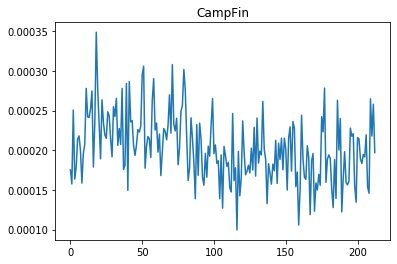

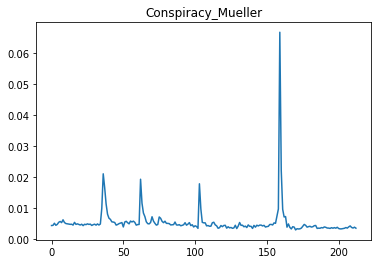

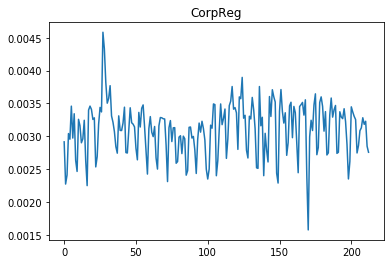

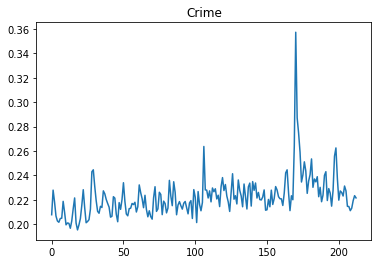

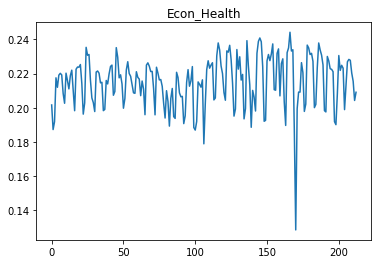

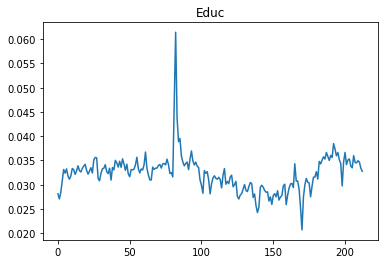

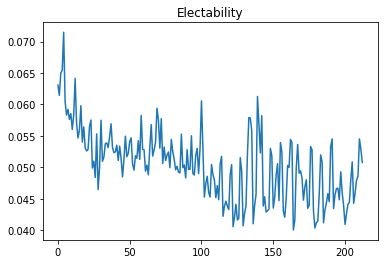

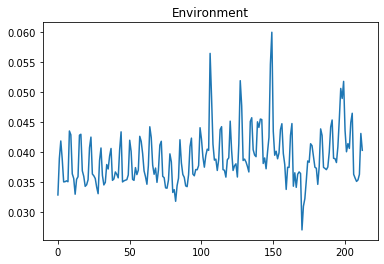

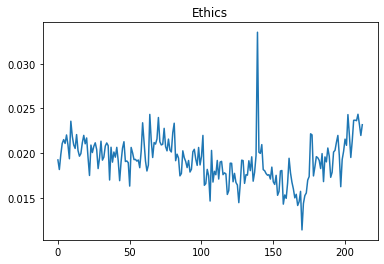

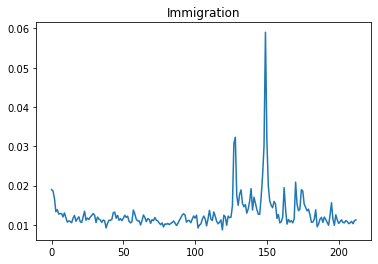

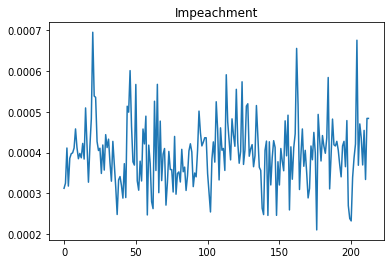

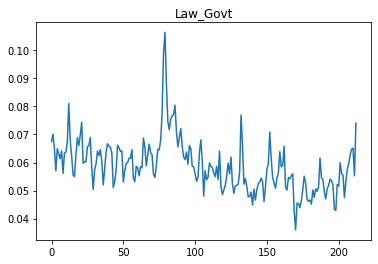

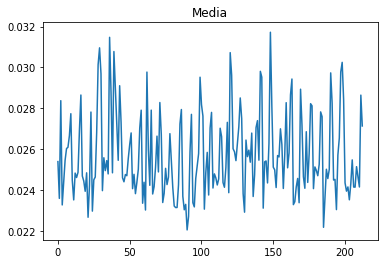

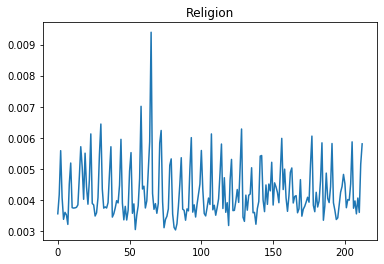

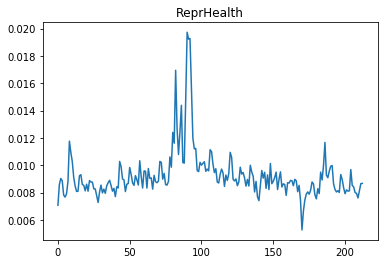

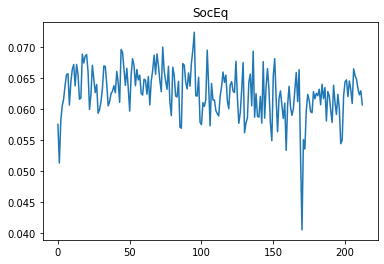

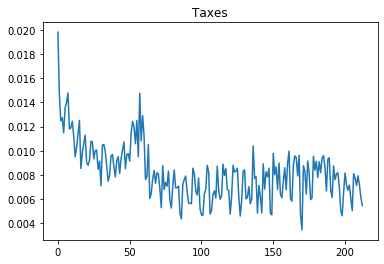

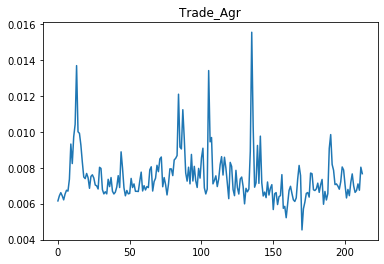

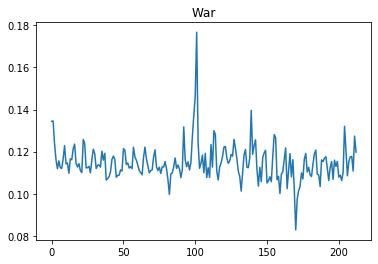

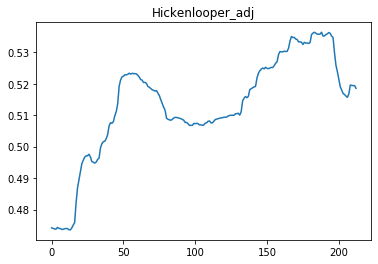

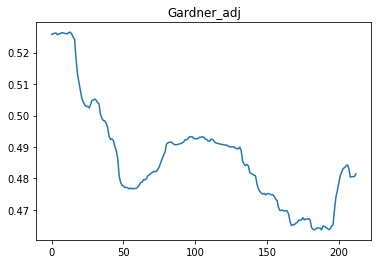

In [22]:
#Original data, no roll
reg_df_date = reg_df.drop(['Date'], axis = 1)
reg_cols = reg_df_date.columns
for i in reg_cols: 
    plt.plot(reg_df_date[i])
    plt.title(i)
    plt.show()

# Histograms
#### Distribution of each variable

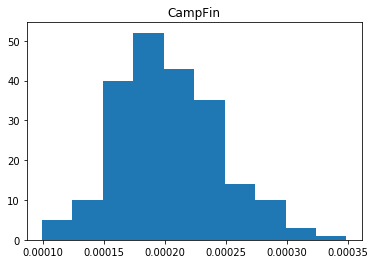

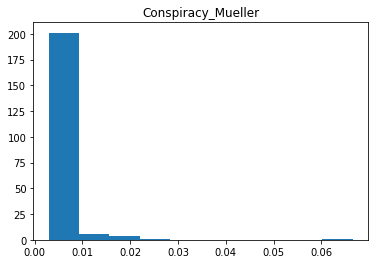

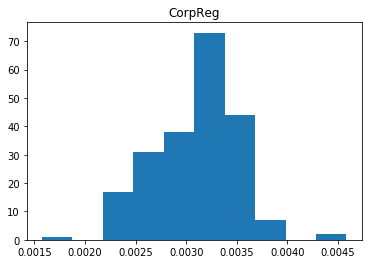

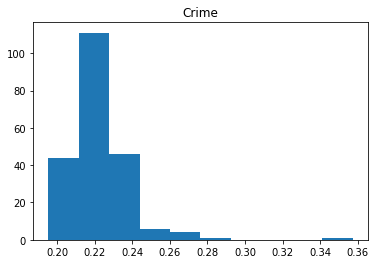

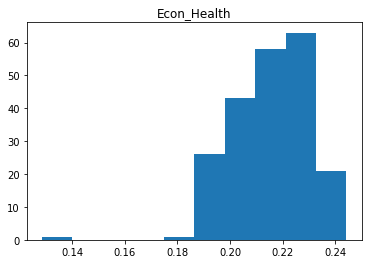

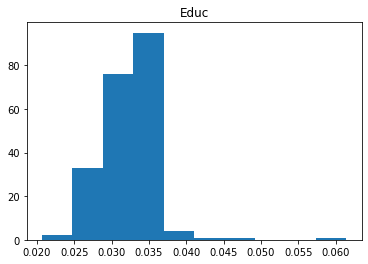

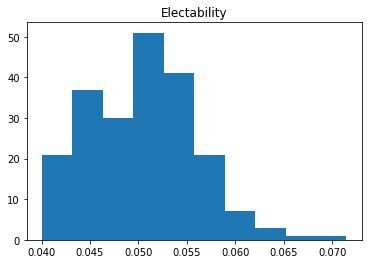

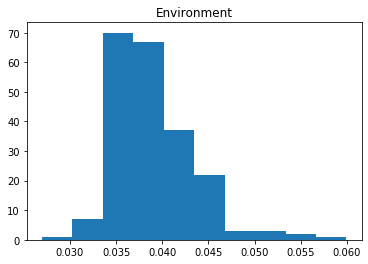

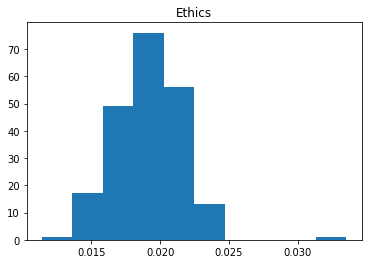

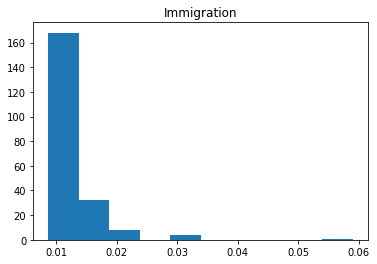

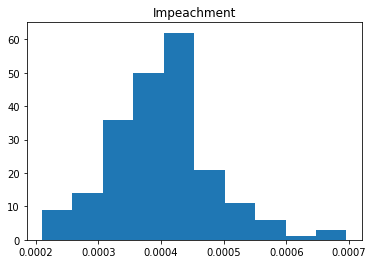

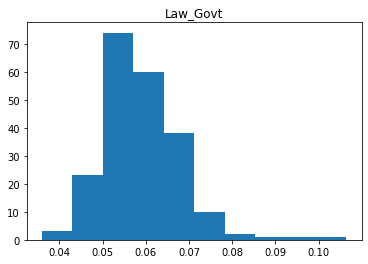

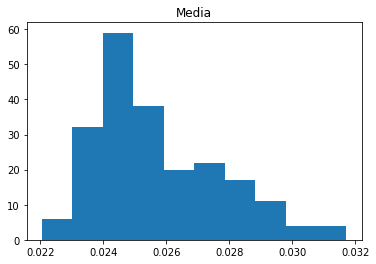

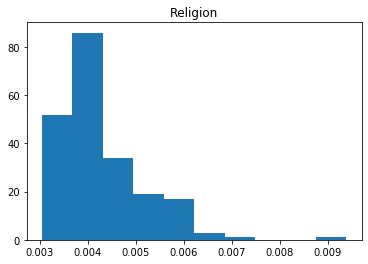

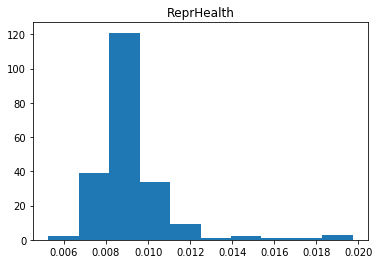

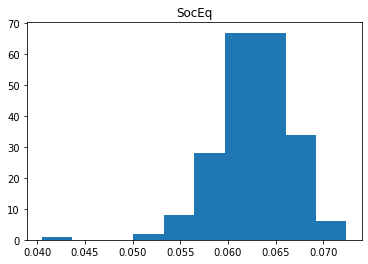

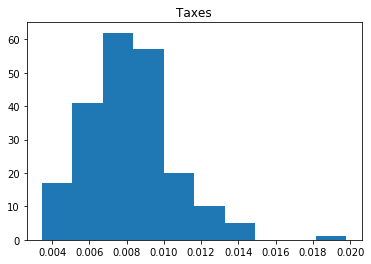

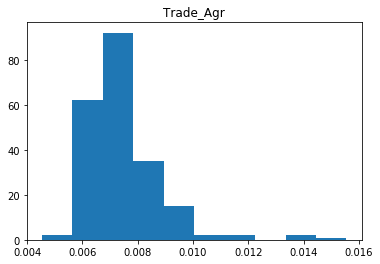

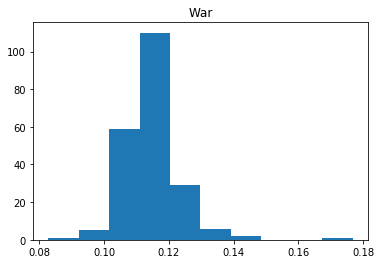

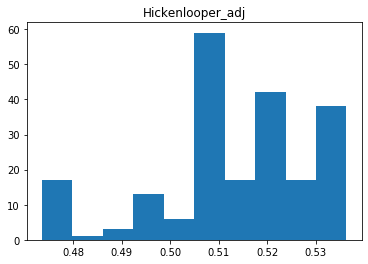

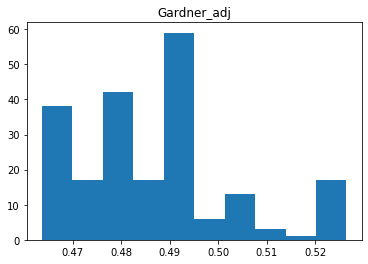

In [23]:
for i in reg_cols:
    plt.hist(reg_df_date[i])
    plt.title(i)
    plt.show()

# Rolling data
#### Use if you want to take a rolling average of the data

In [24]:
#roll_3 = reg_df.set_index(['Date'])
#roll_3 = roll_3.rolling(3).mean()
#roll_3 = roll_3.dropna()
#roll_3 = roll_3.reset_index()
#roll_3.head()

# Rolling Train/Test and data exploration
#### Replace X variables dataframe with non rolled version if necessary

In [25]:
# if not rolling data, rename this variable and replace throughout 
# x = reg_df.drop(...)
x_3 = reg_df.drop(columns={'Date','Hickenlooper_adj', 'Gardner_adj', 'Electability'})

hickenlooper = reg_df['Hickenlooper_adj']
gardner = reg_df['Gardner_adj']
x_train_hickenlooper, x_test_hickenlooper, y_train_hickenlooper, y_test_hickenlooper = train_test_split(x_3, hickenlooper, test_size=0.3, random_state=42)
x_train_gardner, x_test_gardner, y_train_gardner, y_test_gardner = train_test_split(x_3, gardner, test_size=0.3, random_state=42)


In [26]:
x_3.head()

,CampFin,Conspiracy_Mueller,CorpReg,Crime,Econ_Health,Educ,Environment,Ethics,Immigration,Impeachment,Law_Govt,Media,Religion,ReprHealth,SocEq,Taxes,Trade_Agr,War
0,0.000175,0.004315,0.002915,0.207685,0.201643,0.028119,0.032814,0.019238,0.019001,0.000312,0.067476,0.025396,0.003561,0.007064,0.057543,0.019798,0.006152,0.134410
1,0.000158,0.004365,0.002273,0.227875,0.187248,0.027065,0.038872,0.018166,0.018637,0.000325,0.070125,0.023598,0.004175,0.008580,0.051307,0.014653,0.006433,0.134555
2,0.000251,0.005051,0.002411,0.218159,0.191872,0.028395,0.041812,0.019821,0.016827,0.000411,0.064868,0.028375,0.005589,0.009026,0.058129,0.012476,0.006612,0.123768
3,0.000164,0.004391,0.003042,0.206623,0.217505,0.030776,0.038804,0.021084,0.013378,0.000318,0.057048,0.023278,0.004083,0.008865,0.060552,0.012737,0.006438,0.116312
4,0.000179,0.004687,0.002955,0.202559,0.211962,0.033133,0.034990,0.021512,0.013896,0.000386,0.064920,0.024379,0.003383,0.007816,0.061677,0.011486,0.006211,0.111861


### Train Test random split

In [27]:
#Hickenlooper
reg_hickenlooper = LinearRegression().fit(x_train_hickenlooper, y_train_hickenlooper)
pred_train_hickenlooper = reg_hickenlooper.predict(x_train_hickenlooper)
pred_test_hickenlooper = reg_hickenlooper.predict(x_test_hickenlooper)
print('Hickenlooper:: Train:', round(r2_score(y_train_hickenlooper,pred_train_hickenlooper),3),' Test:', round(r2_score(y_test_hickenlooper,pred_test_hickenlooper),3))

#Gardner
reg_gardner = LinearRegression().fit(x_train_gardner, y_train_gardner)
pred_train_gardner = reg_gardner.predict(x_train_gardner)
pred_test_gardner = reg_gardner.predict(x_test_gardner)
print('gardner:: Train:', round(r2_score(y_train_gardner,pred_train_gardner),3),' Test:', round(r2_score(y_test_gardner,pred_test_gardner),3))

Hickenlooper:: Train: 0.593  Test: 0.45
gardner:: Train: 0.593  Test: 0.45


### Train Test chronological split

In [28]:
hickenlooper_train = reg_df['Hickenlooper_adj'][:200]
gardner_train = reg_df['Gardner_adj'][:200]
hickenlooper_test = reg_df['Hickenlooper_adj'][200:]
gardner_test = reg_df['Gardner_adj'][200:]
x_3_train = x_3[:200]
x_3_test = x_3[200:]

In [29]:
x_3_test

,CampFin,Conspiracy_Mueller,CorpReg,Crime,Econ_Health,Educ,Environment,Ethics,Immigration,Impeachment,Law_Govt,Media,Religion,ReprHealth,SocEq,Taxes,Trade_Agr,War
200,0.000216,0.003354,0.003448,0.219632,0.230537,0.036641,0.043562,0.021566,0.010379,0.000232,0.051538,0.024356,0.004526,0.007914,0.064419,0.008165,0.007042,0.107893
201,0.000214,0.003228,0.003370,0.227177,0.221852,0.034138,0.040011,0.020872,0.010809,0.000339,0.059947,0.023953,0.003756,0.008196,0.064737,0.007192,0.006317,0.108829
202,0.000189,0.003242,0.003303,0.225971,0.224832,0.035099,0.041368,0.024309,0.011309,0.000387,0.056076,0.024158,0.004018,0.008104,0.062037,0.006755,0.006791,0.106236
203,0.000183,0.003347,0.003254,0.223041,0.223125,0.035318,0.040569,0.022042,0.010622,0.000421,0.055413,0.023529,0.003999,0.008118,0.064564,0.007164,0.006444,0.110108
204,0.000195,0.003425,0.002746,0.231224,0.198917,0.033827,0.044904,0.019514,0.010552,0.000676,0.047500,0.024309,0.004523,0.009680,0.063148,0.006061,0.007182,0.132054
205,0.000192,0.003664,0.002859,0.227276,0.212604,0.033476,0.046432,0.021363,0.011102,0.000369,0.053453,0.025480,0.005872,0.008525,0.060927,0.005056,0.007657,0.120357
206,0.000219,0.003482,0.003085,0.214590,0.226872,0.035998,0.036251,0.023671,0.010864,0.000471,0.057463,0.024153,0.003739,0.008400,0.066510,0.008116,0.006991,0.108542
207,0.000154,0.003879,0.003129,0.214429,0.228266,0.034580,0.035627,0.023688,0.010325,0.000437,0.059640,0.024149,0.003973,0.007997,0.065414,0.007744,0.006628,0.115359
208,0.000146,0.004182,0.003282,0.211015,0.227759,0.034503,0.035070,0.023630,0.010531,0.000370,0.062695,0.025149,0.003558,0.007936,0.064808,0.007148,0.006732,0.117532
209,0.000265,0.003697,0.003182,0.213075,0.220319,0.034939,0.035310,0.024348,0.010916,0.000455,0.064754,0.024638,0.004067,0.007604,0.063294,0.007939,0.007100,0.117699


In [30]:
#Hickenlooper
reg_hickenlooper = LinearRegression().fit(x_3_train, hickenlooper_train)
pred_train_hickenlooper = reg_hickenlooper.predict(x_3_train)
pred_test_hickenlooper = reg_hickenlooper.predict(x_3_test)

print('hickenlooper:: Train:', round(r2_score(hickenlooper_train,pred_train_hickenlooper),3),' Test:', round(r2_score(hickenlooper_test,pred_test_hickenlooper),3))

#Gardner
reg_gardner = LinearRegression().fit(x_3_train, gardner_train)
pred_train_gardner = reg_gardner.predict(x_3_train)
pred_test_gardner = reg_gardner.predict(x_3_test)
print('gardner:: Train:', round(r2_score(gardner_train,pred_train_gardner),3),' Test:', round(r2_score(gardner_test,pred_test_gardner),3))

hickenlooper:: Train: 0.575  Test: -24.426
gardner:: Train: 0.575  Test: -24.426


In [31]:
reg_hickenlooper.score(x_3_test, hickenlooper_test)

-24.426473025583483

# Regression
#### Recommend naming variables per candidate as in "candidate"_baseline instead of just baseline
#### Adjust first line for model without a constant(intercept)

In [32]:
hickenlooper_baseline = sm.add_constant(x_3)
mod = sm.OLS(hickenlooper, hickenlooper_baseline)
res = mod.fit()
res.summary()
# This is the baseline model with all variables

C:\Users\boai-\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Hickenlooper_adj   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     14.00
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           2.59e-26
Time:                        13:47:09   Log-Likelihood:                 663.78
No. Observations:                 213   AIC:                            -1290.
Df Residuals:                     194   BIC:                            -1226.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0036      0.102     -0.035      0.972      -0.204       0.197
CampFin               28.9901     22.048      1.315      0.190     -14.494      72.474
Conspiracy_Mueller     0.7874      0.202      3.901      0.000       0.389       1.186
CorpReg               -7.1429      3.574     -1.998      0.047     -14.192      -0.094
Crime                  0.9434      0.156      6.048      0.000       0.636       1.251
Econ_Health            0.8585      0.141      6.072      0.000       0.580       1.137
Educ                   0.9493      0.282      3.371      0.001       0.394       1.505
Environment            0.5418      0.298      1.820      0.070      -0.045       1.129
Ethics                 0.4259      0.458      0.931      0.353      -0.477       1.329
Immigration            0.7173      0.235      3.055      0.003       0.254       1.180
Impeachment           -8.2405     10.440     -0.789      0.431     -28.830      12.349
Law_Govt               0.0707      0.157      0.452      0.652      -0.238       0.380
Media                 -0.5843      0.590     -0.991      0.323      -1.748       0.579
Religion               0.3538      1.265      0.280      0.780      -2.142       2.849
ReprHealth            -0.1086      0.600     -0.181      0.857      -1.292       1.075
SocEq                  1.0782      0.362      2.975      0.003       0.363       1.793
Taxes                 -2.1215      0.470     -4.514      0.000      -3.048      -1.195
Trade_Agr             -1.9568      0.693     -2.822      0.005      -3.324      -0.589
War                    0.3779      0.157      2.413      0.017       0.069       0.687
==============================================================================
Omnibus:                        8.370   Durbin-Watson:                   0.516
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                5.531
Skew:                           0.247   Prob(JB):                       0.0629
Kurtosis:                       2.385   Cond. No.                     3.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Fill in columns to drop

In [33]:
#dropping fields with p > .1 
hickenlooper_final = hickenlooper_baseline.drop(columns={'Conspiracy_Mueller','Crime','CampFin','Educ','Environment','Religion','Impeachment','Media','SocEq','Taxes','Trade_Agr'}, axis = 1)
mod = sm.OLS(hickenlooper, hickenlooper_final)
res = mod.fit()
res.summary()
#print(res.summary())
# This is the final model with significant variables remaining

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Hickenlooper_adj   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     10.20
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           6.07e-11
Time:                        13:47:09   Log-Likelihood:                 606.93
No. Observations:                 213   AIC:                            -1198.
Df Residuals:                     205   BIC:                            -1171.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5897      0.026     22.508      0.000       0.538       0.641
CorpReg        -6.8227      4.163     -1.639      0.103     -15.031       1.386
Econ_Health     0.2190      0.110      1.993      0.048       0.002       0.436
Ethics         -0.5272      0.457     -1.155      0.250      -1.427       0.373
Immigration     0.0756      0.223      0.340      0.734      -0.363       0.515
Law_Govt       -0.7288      0.122     -5.991      0.000      -0.969      -0.489
ReprHealth      0.4224      0.595      0.710      0.478      -0.751       1.595
War            -0.4724      0.130     -3.646      0.000      -0.728      -0.217
==============================================================================
Omnibus:                       26.562   Durbin-Watson:                   0.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.884
Skew:                          -0.861   Prob(JB):                     7.23e-08
Kurtosis:                       3.859   Cond. No.                     4.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# Correlation Matrix of significant variables
hickenlooper_final.drop(['const'], axis = 1).corr()

,CorpReg,Econ_Health,Ethics,Immigration,Law_Govt,ReprHealth,War
CorpReg,1.000000,0.792820,-0.095004,-0.207163,0.025475,-0.249059,-0.357547
Econ_Health,0.792820,1.000000,0.005486,-0.222170,0.024644,-0.222926,-0.309973
Ethics,-0.095004,0.005486,1.000000,-0.135974,0.306659,-0.039443,0.269024
Immigration,-0.207163,-0.222170,-0.135974,1.000000,-0.228361,-0.089320,0.104369
Law_Govt,0.025475,0.024644,0.306659,-0.228361,1.000000,0.270782,-0.078353
ReprHealth,-0.249059,-0.222926,-0.039443,-0.089320,0.270782,1.000000,0.115704
War,-0.357547,-0.309973,0.269024,0.104369,-0.078353,0.115704,1.000000


In [35]:
# Variance Inflation Factor of significant variables
pd.Series([variance_inflation_factor(hickenlooper_final.values, i) 
               for i in range(hickenlooper_final.shape[1])], 
              index=hickenlooper_final.columns).sort_values()

Immigration      1.137639
ReprHealth       1.226448
War              1.288250
Law_Govt         1.311372
Ethics           1.314465
Econ_Health      2.787859
CorpReg          2.912389
const          717.374319
dtype: float64

### Repeat per candidate

In [36]:
gardner_baseline = sm.add_constant(x_3)
mod = sm.OLS(gardner, gardner_baseline)
res = mod.fit()
res.summary()
# This is the baseline model with all variables

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gardner_adj   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     14.00
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           2.59e-26
Time:                        13:47:09   Log-Likelihood:                 663.78
No. Observations:                 213   AIC:                            -1290.
Df Residuals:                     194   BIC:                            -1226.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.0036      0.102      9.869      0.000       0.803       1.204
CampFin              -28.9901     22.048     -1.315      0.190     -72.474      14.494
Conspiracy_Mueller    -0.7874      0.202     -3.901      0.000      -1.186      -0.389
CorpReg                7.1429      3.574      1.998      0.047       0.094      14.192
Crime                 -0.9434      0.156     -6.048      0.000      -1.251      -0.636
Econ_Health           -0.8585      0.141     -6.072      0.000      -1.137      -0.580
Educ                  -0.9493      0.282     -3.371      0.001      -1.505      -0.394
Environment           -0.5418      0.298     -1.820      0.070      -1.129       0.045
Ethics                -0.4259      0.458     -0.931      0.353      -1.329       0.477
Immigration           -0.7173      0.235     -3.055      0.003      -1.180      -0.254
Impeachment            8.2405     10.440      0.789      0.431     -12.349      28.830
Law_Govt              -0.0707      0.157     -0.452      0.652      -0.380       0.238
Media                  0.5843      0.590      0.991      0.323      -0.579       1.748
Religion              -0.3538      1.265     -0.280      0.780      -2.849       2.142
ReprHealth             0.1086      0.600      0.181      0.857      -1.075       1.292
SocEq                 -1.0782      0.362     -2.975      0.003      -1.793      -0.363
Taxes                  2.1215      0.470      4.514      0.000       1.195       3.048
Trade_Agr              1.9568      0.693      2.822      0.005       0.589       3.324
War                   -0.3779      0.157     -2.413      0.017      -0.687      -0.069
==============================================================================
Omnibus:                        8.370   Durbin-Watson:                   0.516
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                5.531
Skew:                          -0.247   Prob(JB):                       0.0629
Kurtosis:                       2.385   Cond. No.                     3.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
#dropping fields with p > .1 
gardner_final = gardner_baseline.drop(columns={'Conspiracy_Mueller','Crime','CampFin','Educ','Environment','Impeachment','Religion','Media','SocEq','Taxes','Trade_Agr'}, axis = 1)
mod = sm.OLS(gardner, gardner_final)
res = mod.fit()
res.summary()
#print(res.summary())
# This is the final model with significant variables remaining

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gardner_adj   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     10.20
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           6.07e-11
Time:                        13:47:09   Log-Likelihood:                 606.93
No. Observations:                 213   AIC:                            -1198.
Df Residuals:                     205   BIC:                            -1171.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4103      0.026     15.663      0.000       0.359       0.462
CorpReg         6.8227      4.163      1.639      0.103      -1.386      15.031
Econ_Health    -0.2190      0.110     -1.993      0.048      -0.436      -0.002
Ethics          0.5272      0.457      1.155      0.250      -0.373       1.427
Immigration    -0.0756      0.223     -0.340      0.734      -0.515       0.363
Law_Govt        0.7288      0.122      5.991      0.000       0.489       0.969
ReprHealth     -0.4224      0.595     -0.710      0.478      -1.595       0.751
War             0.4724      0.130      3.646      0.000       0.217       0.728
==============================================================================
Omnibus:                       26.562   Durbin-Watson:                   0.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.884
Skew:                           0.861   Prob(JB):                     7.23e-08
Kurtosis:                       3.859   Cond. No.                     4.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# Correlation Matrix of significant variables
gardner_final.drop(['const'], axis = 1).corr()

,CorpReg,Econ_Health,Ethics,Immigration,Law_Govt,ReprHealth,War
CorpReg,1.000000,0.792820,-0.095004,-0.207163,0.025475,-0.249059,-0.357547
Econ_Health,0.792820,1.000000,0.005486,-0.222170,0.024644,-0.222926,-0.309973
Ethics,-0.095004,0.005486,1.000000,-0.135974,0.306659,-0.039443,0.269024
Immigration,-0.207163,-0.222170,-0.135974,1.000000,-0.228361,-0.089320,0.104369
Law_Govt,0.025475,0.024644,0.306659,-0.228361,1.000000,0.270782,-0.078353
ReprHealth,-0.249059,-0.222926,-0.039443,-0.089320,0.270782,1.000000,0.115704
War,-0.357547,-0.309973,0.269024,0.104369,-0.078353,0.115704,1.000000


In [39]:
# Variance Inflation Factor of significant variables
pd.Series([variance_inflation_factor(gardner_final.values, i) 
               for i in range(gardner_final.shape[1])], 
              index=gardner_final.columns).sort_values()

Immigration      1.137639
ReprHealth       1.226448
War              1.288250
Law_Govt         1.311372
Ethics           1.314465
Econ_Health      2.787859
CorpReg          2.912389
const          717.374319
dtype: float64